# **L'analyse économétrique des réseaux bipartis**

### **I - Introduction**

Dans les réseaux bipartis, deux types d'agents interagissent, ces structures bipartites sont donc présentes dans de nombreux domaines de l'économie. L'une des particularités des réseaux bipartis est la présence d'hétérogénéité inobservé bilatérale. Les réseaux bipartis sont donc, comme nous allons le voir, adapté pour représenter les interactions entre les médecins et les patients. 

L'article présente deux principales méthodes pour estimer les paramètres des modèles avec hétérogénéité inobservé bilatérale : la méthode AKM ainsi que la "two-step grouped fixed-effects method". Nous allons vous présenter ces deux méthodes puis les appliquer à notre problème d'interaction entre les médecins et les patients.

### **II - Importation de packages**

In [1]:
import numpy as np
import fonctionsAKM

### **III - Création du Graphe**

#### *a) Les réseaux Bipartis*

Un graphe biparti est un un graphe où l'ensemble des sommets V est séparé en deux sous-ensembles V1 et V2 tel que toutes les arrêtes de l'ensemble des arrêtes E relient un point de V1 à un point de V2. Il ne peut donc pas avoir d'arrête entre deux points de V1 ou deux points de V2. 

Un réseau biparti est un graphe biparti (V1,V2,E) où les sommets et les arrêtes du graphe sont associés à des variables aléatoires. Soit i in élément de V1 et j un élément de V2, on introduit des variables aléatoires $D_{ijt}$ qui valent 1 si i et j sont reliés au moins t fois et 0 sinon. Le "t" est introduit pour prendre en compte plusieurs liens entre i et j, en fonction du problème étudié si un seul lien peut exister entre un point de V1 et un point de V2 il peut être omis. On introduit ensuite des variables $Y_{ijt}$ qui correspondent à un résultat d'un appariement entre i et j pour le lien t. $Y_{ijt}$ n'est observé que si $D_{ijt}$ = 1.
Pour prendre un exemple concret, V1 peut correspondre aux travailleurs, et V2 aux entreprises, si un travailleur i de V1 travaille dans une entreprise j de V2 alors $D_{ij}$ = 1. On peut alors prendre $Y_{ij}$ le salaire de i lorsqu'il travaille dans l'entreprise j. Ce salaire n'est observé que si i travaille réellement chez j et donc si $D_{ij}$ = 1.

De plus, $Y_{ijt}$ dépend d'une variable $X_{ijt}$ qui correspond à des caractéristiques observées de la relation t entre i,j, de deux variables inobservées $\alpha_{i}$ et $\psi_{j}$ qui correspondent à des caractéristiques propres à i et à j ainsi que de $\epsilon_{ijt}$ correspondant aux caractéristiques inobservées de la relation t entre i,j.
La présence de $\alpha_{i}$ et $\psi_{j}$ correspond à ce que nous appelions dans l'introduction l'hétérogénéité inobservé bilatérale.

Nous ferons par la suite, et donc pour les deux modèles présentés, l'hypothèse que le réseau est exogène c'est à dire :
 $ \forall i \in V_1, \forall j \in V_2  $  $D_{ijt} \perp \epsilon_{ijt} \mid (X_{ijt}, \alpha_{i}, \epsilon_{j})$.
On fera aussi l'hypothèse suivante :
 $Y_{ijt} \perp Y_{i'j't} \mid X, \alpha, \psi, D \quad \text{pour tout } (i, j) \ne (i', j')$ 

 Pour un modèle linéaire, le modèle sera donc le suivant :
 $ \forall i \in V_1, \forall j \in V_2  $  
 $Y^*_{ijt} = X'_{ijt} \beta + \alpha_i + \psi_j + \epsilon_{ijt}$ 
 
 $Y_{ijt} = D_{ijt} \cdot Y^*_{ijt}$


#### *b) Application aux interactions entre les médecins et les patients*

On commence par créer une instance de notre graphe bipartite. 

On se place dans un contexte médicale avec un certains nombres de patients i et de docteurs j.

Leurs positions repsectives sont générées alléatoirement sur [0;1]x[0;1] et on calcule les distance Xij.

In [2]:
nombre_patient=100
nombre_docteur=30

In [3]:
akm = fonctionsAKM.graph_AKM(nombre_patient, nombre_docteur)

On génère ensuite des effets fixes pour les médecins et les docteurs.
L'effet fixe du patient peut correspondre à son état de santé global et celui du docteur, sa renomée

In [4]:
alpha = -np.random.randint(0,3,size=akm.nombre_patient)/10
psi = np.random.randint(0,3,size=akm.nombre_docteur)/10
beta_lien = -2

On génère ensuite la matirce des liens selon le modèle suivant:

$lien_{ij}$ suit un loi de Bernouilli de paramètre $\frac{e^{\lambda_{ij}}}{1+e^{\lambda_{ij}}}$ où:

 $\lambda_{ij}=  \beta lien * distance_{ij} + effetpatient_i + effetdocteur_j $

In [5]:
akm.create_link(alpha, psi, beta_lien, show=False)

In [6]:
print("sparcity = ", int(akm.lien.sum())/(akm.nombre_docteur*akm.nombre_patient))

sparcity =  0.26666666666666666


# Modèle AKM

Ensuite, on génère un prix de consultation potentiel $Y^*$ selon le modèle suivant:

Pour des effets fixes:

$\alpha_i$ du docteur $i$ et $\psi_j$ du patient $j$. (par exemple la gravité de la maladie et si le docteur est bon ou non)

$Y^*_{ij} = constente + \alpha_i + \psi_j + \beta*distance_{ij} + \epsilon_{ij} \quad$  où $\epsilon_{ij} \sim_{iid} \mathcal{N}(0,v)$

On considère ensuite $Y=Lien \times Y^*$, le prix observé, et on résout avec AKM.

In [31]:
alpha_sante = -np.random.randint(0,3,size=akm.nombre_patient)/1
psi_sante = np.random.randint(0,3,size=akm.nombre_docteur)/1
psi_sante[len(psi_sante)-1]=0 #identification

print("effet fixe patient:", alpha_sante)
print("")
print("effet fixe docteur:", psi_sante)

effet fixe patient: [-2.  0. -2. -1.  0. -2. -2. -2.  0. -1. -1. -2. -1.  0.  0. -1. -1. -2.
 -2.  0. -1. -1. -2. -2.  0. -1.  0. -1. -2. -1.  0.  0. -1. -2. -2. -1.
  0.  0. -1. -2. -2. -2. -1. -1. -1. -1. -1. -1. -1. -2.  0. -1. -2.  0.
 -2. -2. -2.  0. -2. -1. -2.  0.  0.  0. -2. -1.  0. -1. -2. -1.  0. -2.
  0. -2.  0. -1. -2. -2. -1.  0.  0. -1. -2. -1.  0.  0.  0.  0.  0. -2.
  0. -2. -1. -1.  0.  0.  0. -1. -2. -1.]

effet fixe docteur: [1. 0. 0. 2. 2. 0. 1. 2. 2. 1. 0. 1. 0. 2. 1. 0. 1. 0. 0. 1. 0. 1. 2. 1.
 2. 0. 0. 2. 2. 0.]


In [32]:
estimation = akm.solve_model(alpha_sante, psi_sante, constente=0, beta=1)

print(f"""
la constante estimée est: {estimation[0][0]}, au lieu de: {akm.constente}
le beta estimée est: {estimation[0][1]}, au lieu de: {akm.beta}
les α estimés sont: {estimation[1][:3]}..., au lieu de: {akm.alpha[:3]}...
les ψ estimés sont: {estimation[2][:3]}..., au lieu de: {akm.psi[:3]}...
""")

akm.model_recap()



la constante estimée est: [0.32163005], au lieu de: 0
le beta estimée est: [0.28472943], au lieu de: 1
les α estimés sont: [-1.77157952 -0.35214507 -1.84096272]..., au lieu de: [-2.  0. -2.]...
les ψ estimés sont: [ 0.94968731 -0.02871728  0.2384259 ]..., au lieu de: [1. 0. 0.]...

 Les liens sont créés selon le modèle: Dij ~ B (1-1/(1+exp(λij))) 
                où λ_ij = 0.0*Xij + effet_pati + effet_docj
                avec effet_pat dans [-0.2;0.0]
                avec effet_doc dans [0.0;0.2]
                
 Les prix sont créés selon le modèle: Yij = 0 + 1*Xij + αi + ψj + εij
                où εij ~ N(0,1)
                avec α dans [-2.0;0.0]
                avec ψ dans [0.0;2.0]
                


On peut ensuite mesurer la performance du modèle et en particulier les MSE:

In [33]:
a = akm.show_perf() 

Le mse_prix vaut: 1.038, il doit normalement valoir la variance du bruit = 1
Le mse_alpha vaut: 0.0735482510915198
Le mse_psi vaut: 0.01985612097404054


# Scalabilité du modèle

On veut voir comment évolue la qualité de l'estimation des effets fixes avec la densité du graph. 

Pour cela on fixe un modèle pour les prix mais on change les paramètres du modèle de création des liens.

100%|██████████| 10/10 [00:44<00:00,  4.40s/it]


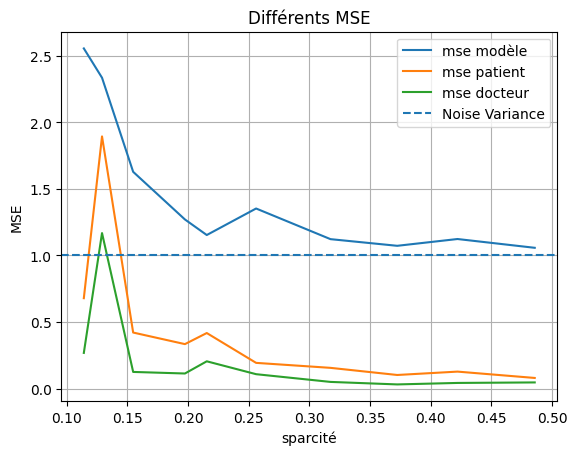

In [34]:
if True:
    akm.sparcity(-5,0,10)

# Co-clustering

In [35]:
nombre_docteur_cc=100
nombre_patient_cc=100

#création lien
effet_pat_cc = -np.random.randint(0,30,size=nombre_patient_cc)/10
effet_doc_cc = np.random.randint(0,30,size=nombre_docteur_cc)/10
beta_lien_cc = -2

#création prix
alpha_cc = np.random.randint(0,3,size=nombre_patient_cc)/10
psi_cc = np.random.randint(0,3,size=nombre_docteur_cc)/10
constente_cc = 1
beta_cc = 3
std_bruit_cc = 1

#résolution
nombre_cluster_cc = 10

In [36]:
akm_cc=fonctionsAKM.graph_AKM(nombre_patient_cc,nombre_docteur_cc)
akm_cc.create_link(effet_pat_cc, effet_doc_cc, beta_lien_cc, show=False )
print("sparcity = ", int(akm_cc.lien.sum())/(akm_cc.nombre_docteur*akm_cc.nombre_patient))

sparcity =  0.3372


la valeur de beta lien estimée est :-1.6603013574401209, elle est en réalité de -2


la valeur de beta estimée est :3.050215947855441, elle est en réalité de 3
corrélation des effets fixes des docteurs avec la moyenne du groupe estimé 0.9145848206907008
corrélation des effets fixes des patients avec la moyenne du groupe estimé 0.9390328981301111


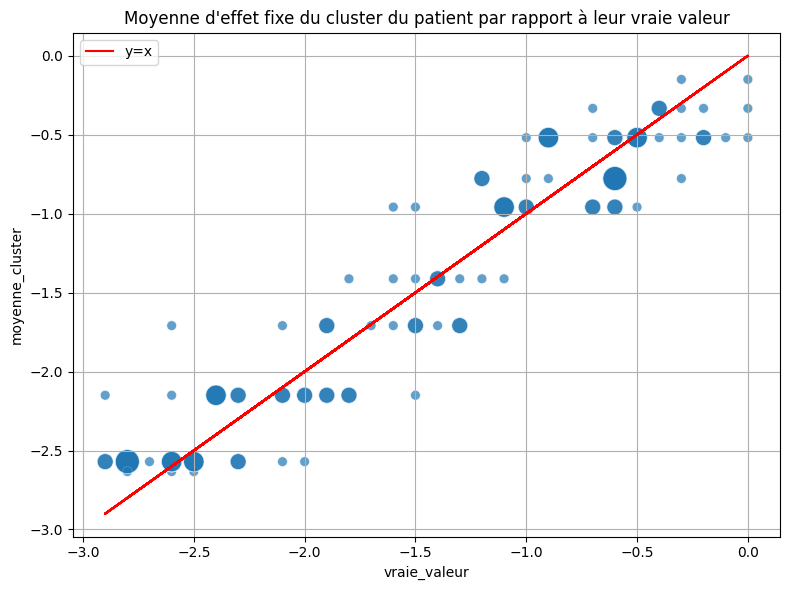

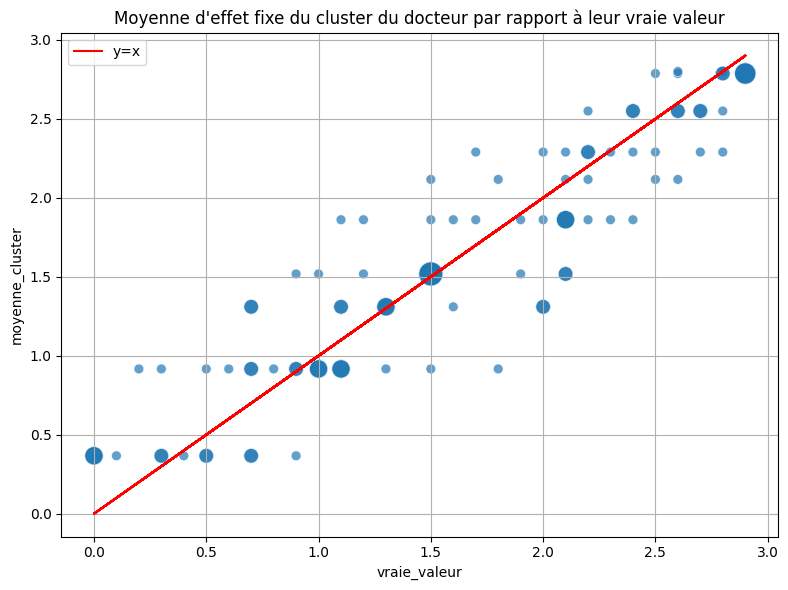

In [37]:
modèle_cc=akm_cc.coclustering(alpha=alpha_cc, psi=psi_cc, constente=constente_cc, beta=beta_cc, std_bruit = std_bruit_cc, nombre_cluster=nombre_cluster_cc, print_reg=False ,print_corr=True)

In [38]:
print(modèle_cc[0].summary())

                           Logit Regression Results                           
Dep. Variable:                   link   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2039
Time:                        21:58:57   Log-Likelihood:                -5088.6
converged:                       True   LL-Null:                       -6391.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0843      0.223     -4.864      0.000      -1.521      -0.647
distance              -1.6603      0.101    -16.424      0.000      -1.858      -1.462
cluster_patients_0  

In [39]:
print(modèle_cc[1].summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sun, 04 May 2025   Prob (F-statistic):          2.12e-322
Time:                        21:58:57   Log-Likelihood:                -4740.0
No. Observations:                3372   AIC:                             9520.
Df Residuals:                    3352   BIC:                             9642.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8929      0

In [40]:
akm_cc.model_recap()

 Les liens sont créés selon le modèle: Dij ~ B (1-1/(1+exp(λij))) 
                où λ_ij = -2*Xij + effet_pati + effet_docj
                avec effet_pat dans [-2.9;0.0]
                avec effet_doc dans [0.0;2.9]
                
 Les prix sont créés selon le modèle: Yij = 1 + 3*Xij + αi + ψj + εij
                où εij ~ N(0,1)
                avec α dans [0.0;0.2]
                avec ψ dans [0.0;0.2]
                
